![Two data scientists working on a dashboard.](hr-image-small.png)

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `student_id`   | A unique ID for each student.                 |
| `city`  | A code for the city the student lives in.  |
| `city_development_index` | A scaled development index for the city.       |
| `gender` | The student's gender.       |
| `relevant_experience` | An indicator of the student's work relevant experience.       |
| `enrolled_university` | The type of university course enrolled in (if any).       |
| `education_level` | The student's education level.       |
| `major_discipline` | The educational discipline of the student.       |
| `experience` | The student's total work experience (in years).       |
| `company_size` | The number of employees at the student's current employer.       |
| `last_new_job` | The number of years between the student's current and previous jobs.       |
| `training_hours` | The number of hours of training completed.       |
| `job_change` | An indicator of whether the student is looking for a new job (`1`) or not (`0`).       |

In [107]:
# Start your code here!
import pandas as pd

# Import the data and make a copy
customer_train=pd.read_csv('customer_train.csv')
ds_jobs=customer_train.copy()

# Provide info of the data
print(customer_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

# 1. Exploratory Data Analysis

In [108]:
# Memonry Usage of the original dataset
print(customer_train.memory_usage())

Index                        128
student_id                153264
city                      153264
city_development_index    153264
gender                    153264
relevant_experience       153264
enrolled_university       153264
education_level           153264
major_discipline          153264
experience                153264
company_size              153264
company_type              153264
last_new_job              153264
training_hours            153264
job_change                153264
dtype: int64


In [109]:
print(customer_train.describe())

         student_id  city_development_index  training_hours    job_change
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [110]:
# Create a list of objects
object_list=[element for element in customer_train.columns if customer_train[element].dtype=='object']    
print(object_list)

# Describe the objects
customer_train[object_list].describe()

['city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


<AxesSubplot: ylabel='experience'>

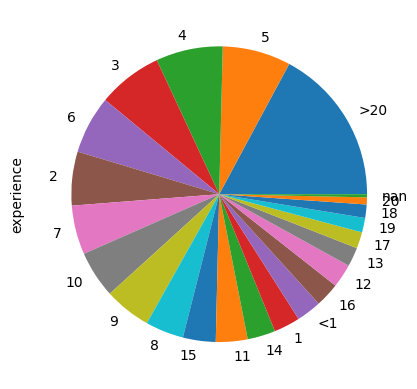

In [111]:
customer_train['experience'].value_counts(normalize=True, dropna=False).plot.pie()

<AxesSubplot: ylabel='company_size'>

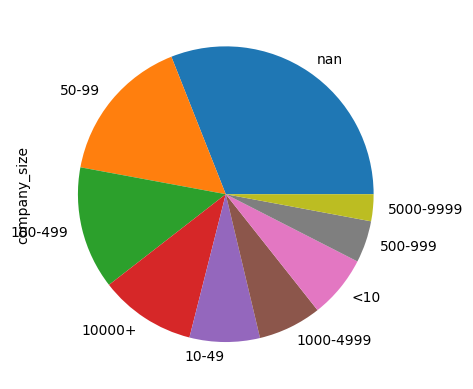

In [112]:
customer_train['company_size'].value_counts(normalize=True, dropna=False).plot.pie()

# 2. Converting intergers, floats, and unordered categories

In [113]:
# Create a dictionary of columns containing ordered categorical data
ordered_cats = {
    'relevant_experience': ['No relevant experience', 'Has relevant experience'],
    'enrolled_university': ['no_enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + list(map(str, range(1, 21))) + ['>20'],
    'company_size': ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4']
}

# Create a loop to change data types
for element in customer_train.columns:
    if customer_train[element].dtype=='int64':
        customer_train[element] = customer_train[element].astype('int32')
    elif customer_train[element].dtype=='float64':
        customer_train[element] = customer_train[element].astype('float16')
    elif element in ordered_cats.keys():
        category = pd.CategoricalDtype(ordered_cats[element], ordered=True)
        customer_train[element] = customer_train[element].astype(category)
    else:
        customer_train[element] = customer_train[element].astype('category')

print(customer_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  int32   
dtypes: category(10), float

# 3. Converting ordered categories

In [114]:
"""# Convert experience so that '<1' and '>20' included in the list
experience_ordered_list = [str(i) for i in range(1,21)]
experience_ordered_list.insert(0,'<1')
experience_ordered_list.append('>20')

# Create experience data type
experience_dtype=pd.CategoricalDtype(experience_ordered_list, ordered=True)

# Assign ordered 
customer_train['experience']=customer_train['experience'].astype(experience_dtype)

print(customer_train['experience'].cat.categories)
"""

"# Convert experience so that '<1' and '>20' included in the list\nexperience_ordered_list = [str(i) for i in range(1,21)]\nexperience_ordered_list.insert(0,'<1')\nexperience_ordered_list.append('>20')\n\n# Create experience data type\nexperience_dtype=pd.CategoricalDtype(experience_ordered_list, ordered=True)\n\n# Assign ordered \ncustomer_train['experience']=customer_train['experience'].astype(experience_dtype)\n\nprint(customer_train['experience'].cat.categories)\n"

In [115]:
"""# Convert company_size to ordered category
company_size_ordered_list = sorted(customer_train['company_size'].unique(), key=str)
company_size_ordered_list.insert(0,company_size_ordered_list.pop(company_size_ordered_list.index('<10')))
company_size_ordered_list.append(company_size_ordered_list.pop(company_size_ordered_list.index('10000+')))

print(company_size_ordered_list)"""

"# Convert company_size to ordered category\ncompany_size_ordered_list = sorted(customer_train['company_size'].unique(), key=str)\ncompany_size_ordered_list.insert(0,company_size_ordered_list.pop(company_size_ordered_list.index('<10')))\ncompany_size_ordered_list.append(company_size_ordered_list.pop(company_size_ordered_list.index('10000+')))\n\nprint(company_size_ordered_list)"

# 4. Reordering columns

In [116]:
# Reorder the column names
ds_jobs_clean=customer_train[ds_jobs.columns]

print(ds_jobs_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  int32   
dtypes: category(10), float

# 5. Filtering on ordered categorical columns

In [117]:
ds_jobs_clean=ds_jobs_clean[(ds_jobs_clean['experience']>='10') & (ds_jobs_clean['company_size']>='1000-4999')]
print(ds_jobs_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 9 to 19143
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              2201 non-null   int32   
 1   city                    2201 non-null   category
 2   city_development_index  2201 non-null   float16 
 3   gender                  1821 non-null   category
 4   relevant_experience     2201 non-null   category
 5   enrolled_university     2185 non-null   category
 6   education_level         2184 non-null   category
 7   major_discipline        2097 non-null   category
 8   experience              2201 non-null   category
 9   company_size            2201 non-null   category
 10  company_type            2144 non-null   category
 11  last_new_job            2184 non-null   category
 12  training_hours          2201 non-null   int32   
 13  job_change              2201 non-null   int32   
dtypes: category(10), float1